In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pd.read_csv('hematite_fe2o3_interp.dat')
# read this file w np.genfromtxt to fix the weird space issues this caused

,0.1\t1.78002\t0.04682
0,0.10116\t1.76602\t0.04923
1,0.10233\t1.75226\t0.05178
2,0.10351\t1.73873\t0.05447
3,0.10471\t1.72539\t0.0573
4,0.10593\t1.71223\t0.0603
...,...
795,954.99259\t4.68355\t0.00232
796,966.05088\t4.68349\t0.00229
797,977.23722\t4.68342\t0.00225
798,988.55309\t4.68336\t0.00222


In [162]:
data= np.genfromtxt('hematite_fe2o3_interp.dat')
# dont use this (hitran values are off... probably the units)
hematite_bad= pd.DataFrame(data, columns=['Wavelength','Reflectance','error?'])


In [165]:
data= pd.read_csv('organized_mars_albedo_data.csv')
del data['Unnamed: 0']
data

,Wavelength,0,1,2,3,4,5,6,7,8,...,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591
0,0.41012,0.08199,0.01784,0.02085,0.02386,0.02505,0.02443,0.02380,0.02349,0.02324,...,0.11653,0.11195,0.10875,0.10768,0.11023,0.12086,0.12870,0.12399,0.11647,0.10934
1,0.44263,0.08199,0.07275,0.07282,0.07290,0.07275,0.07237,0.07200,0.07174,0.07150,...,0.12473,0.12011,0.11861,0.12066,0.12545,0.13683,0.14592,0.14315,0.13889,0.13291
2,0.53374,0.19903,0.18945,0.18952,0.18960,0.18976,0.19003,0.19029,0.19058,0.19088,...,0.19685,0.19093,0.18903,0.19170,0.19790,0.21018,0.22022,0.21658,0.20940,0.19901
3,0.59886,0.24817,0.24358,0.24905,0.25453,0.25390,0.24716,0.24042,0.24307,0.24760,...,0.29268,0.28478,0.28221,0.28569,0.29391,0.30929,0.32191,0.31971,0.31237,0.30008
4,0.65099,0.27648,0.26502,0.27377,0.28252,0.28183,0.27169,0.26156,0.26523,0.27167,...,0.30343,0.29555,0.29323,0.29728,0.30637,0.32306,0.33673,0.33528,0.32864,0.31670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.39712,0.20858,0.21004,0.21630,0.21459,0.21967,0.21714,0.21373,0.22241,0.24419,...,0.10033,0.09987,0.09776,0.09355,0.08925,0.08380,0.08017,0.07760,0.07583,0.07712
68,3.50353,0.26960,0.27045,0.27738,0.27053,0.27427,0.27269,0.27362,0.28775,0.31801,...,0.11682,0.11502,0.11321,0.11056,0.10811,0.10500,0.10162,0.09821,0.09594,0.09454
69,3.63668,0.35915,0.35889,0.36859,0.36493,0.37967,0.38292,0.38845,0.40950,0.45581,...,0.12057,0.12086,0.12126,0.12218,0.12318,0.12180,0.11988,0.12346,0.12711,0.13006
70,3.75665,0.38691,0.38403,0.39096,0.38535,0.39930,0.40478,0.41327,0.43595,0.48194,...,0.12777,0.12820,0.12871,0.12968,0.13056,0.12864,0.12592,0.12879,0.13203,0.13498


## create plots for Fe2o3 and compare it to the true data that was collected for the albedo maps

In [44]:
data

array([[1.0000000e-01, 1.7800200e+00, 4.6820000e-02],
       [1.0116000e-01, 1.7660200e+00, 4.9230000e-02],
       [1.0233000e-01, 1.7522600e+00, 5.1780000e-02],
       ...,
       [9.7723722e+02, 4.6834200e+00, 2.2500000e-03],
       [9.8855309e+02, 4.6833600e+00, 2.2200000e-03],
       [1.0000000e+03, 4.6832900e+00, 2.1800000e-03]])

# Read in olivine data from PSG [0.3-49.86um Neso Olivine Mineral]
- olivine is labeled as a "nesosilicate mineral found in mafic and ultramafic igneous rocks, and has strong spectral features in the thermal infrared"
- this is the olivine spectrum
- PSG gives wavelength in units of microns

In [60]:
olivine_array= np.genfromtxt('olivine_psg_full.txt')
olivine= pd.DataFrame(olivine_array, columns=['Wavelength', 'Reflectance'])
olivine

,Wavelength,Reflectance
0,0.3000,0.03311
1,0.3050,0.03650
2,0.3100,0.03343
3,0.3150,0.03300
4,0.3200,0.03434
...,...,...
2406,48.0128,0.08416
2407,48.4615,0.08332
2408,48.9187,0.08609
2409,49.3846,0.08908


# Pyroxene data from PSG [0.3-49.86um Ino Pyroxene Mineral Mars Met]

In [73]:
pyr_array= np.genfromtxt('pyroxene_fullpsg.txt')
pyroxene= pd.DataFrame(pyr_array, columns= ['Wavelength', 'Reflectance'])
pyroxene

,Wavelength,Reflectance
0,0.3000,0.05126
1,0.3050,0.05060
2,0.3100,0.05212
3,0.3150,0.05404
4,0.3200,0.05654
...,...,...
2375,48.0128,0.07750
2376,48.4615,0.07455
2377,48.9187,0.07291
2378,49.3846,0.07133


# Creating a function to read in data easier...

In [84]:
def organize_data(array):
    old_array= np.genfromtxt(array)
    data_frame= pd.DataFrame(old_array, columns=['Wavelength', 'Reflectance'])
    return data_frame

# Chasignite rock data mars

In [87]:
chasignite= organize_data('chasignite_psgfull.txt')
chasignite

,Wavelength,Reflectance
0,0.3000,0.04512
1,0.3050,0.04544
2,0.3100,0.04780
3,0.3150,0.04812
4,0.3200,0.04953
...,...,...
2406,48.0128,0.08818
2407,48.4615,0.08777
2408,48.9187,0.08851
2409,49.3846,0.09080


# Reading Ino Amphibolite Mineral [0.3-49.86 um]

In [102]:
amphib= organize_data('amphib_fullpsg.txt')
amphib

,Wavelength,Reflectance
0,0.3000,0.03665
1,0.3050,0.04054
2,0.3100,0.03629
3,0.3150,0.03675
4,0.3200,0.03589
...,...,...
3175,48.0128,0.10428
3176,48.4615,0.10438
3177,48.9187,0.10175
3178,49.3846,0.09769


# Reading Dark Glass Mineral [0.3-49.86 um]

In [109]:
dark_glass= organize_data('dark_glass_psgfull.txt')
dark_glass

,Wavelength,Reflectance
0,0.3000,0.05469
1,0.3050,0.06759
2,0.3100,0.07146
3,0.3150,0.06840
4,0.3200,0.07648
...,...,...
2406,48.0128,0.07674
2407,48.4615,0.07788
2408,48.9187,0.08023
2409,49.3846,0.08452


# Reading Maskelynite Glass Mineral [0.3-49.86 um]

In [126]:
mask_glass= organize_data('maskelynite_psgfull.txt')
mask_glass

,Wavelength,Reflectance
0,0.3000,0.01527
1,0.3050,0.02569
2,0.3100,0.03072
3,0.3150,0.03785
4,0.3200,0.04319
...,...,...
2472,48.0128,0.06840
2473,48.4615,0.06749
2474,48.9187,0.06809
2475,49.3846,0.06366


# Reading CO2 Ice [0.4-3.9 um]

In [132]:
co2_ice= organize_data('crism_co2_ice.txt')
co2_ice

,Wavelength,Reflectance
0,0.43613,1.84795
1,0.44263,1.81144
2,0.44914,1.78530
3,0.45564,1.74765
4,0.46215,1.72276
...,...,...
475,3.87006,0.44840
476,3.87673,0.42027
477,3.88341,0.39597
478,3.89008,0.37935


# Reading Fe2O3 (Hematite) from PSG [0.35-2.54 um]

In [163]:
hematite= organize_data('hematite_psg.txt')
hematite

,Wavelength,Reflectance
0,0.351,0.008
1,0.356,0.008
2,0.361,0.008
3,0.366,0.008
4,0.371,0.008
...,...,...
430,2.517,0.839
431,2.522,0.838
432,2.527,0.837
433,2.532,0.837


# Reading Water Ice from PSG [0.44-3.9 um]

In [176]:
water_ice= organize_data('crism_h2o_ice.txt')
water_ice

,Wavelength,Reflectance
0,0.43613,1.66631
1,0.44263,1.64806
2,0.44914,1.60872
3,0.45564,1.58291
4,0.46215,1.56924
...,...,...
460,3.87006,0.73199
461,3.87673,0.73588
462,3.88341,0.73594
463,3.89008,0.73549


In [182]:
smectite= organize_data('crism_al_smectite.txt')
smectite

,Wavelength,Reflectance
0,0.43613,1.20936
1,0.44263,1.21480
2,0.44914,1.21931
3,0.45564,1.22695
4,0.46215,1.23355
...,...,...
475,3.87006,0.92047
476,3.87673,0.92081
477,3.88341,0.91863
478,3.89008,0.91282


## consider binning the data to the resolution that is expected from PSG

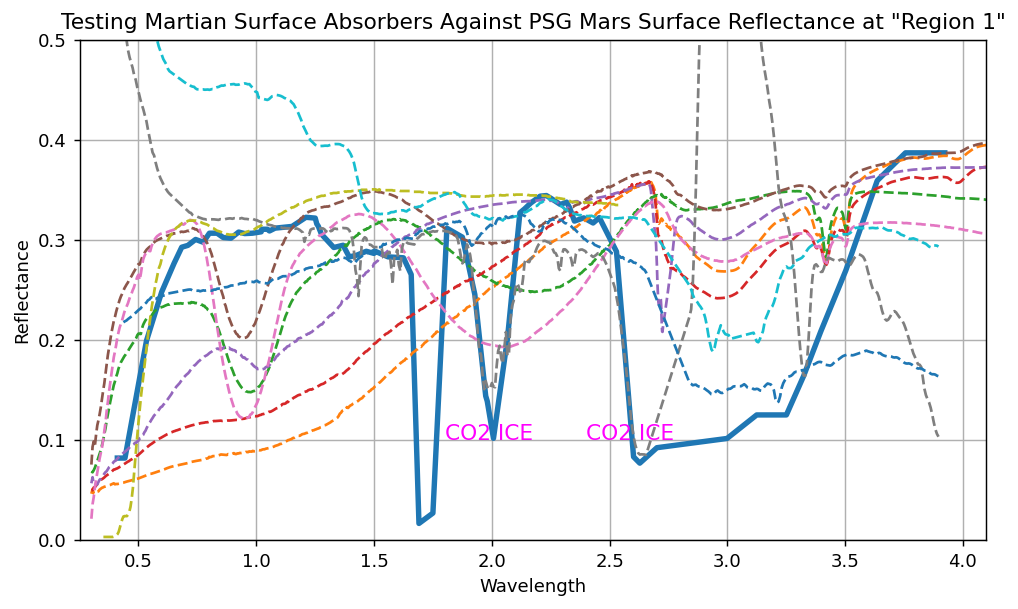

In [239]:
plt.figure(figsize=(9,5), dpi=130)
plt.plot(data['Wavelength'], data['0'], linewidth=3)
#plt.plot(hematite['Wavelength'], hematite['Reflectance']*0.13, label='Hematite (bad)')
plt.plot(olivine['Wavelength'], olivine['Reflectance']*1.4, label='Olivine (PSG)', linestyle='--')
plt.plot(pyroxene['Wavelength'], pyroxene['Reflectance']*1.34, label='Pyroxene (PSG)', linestyle='--')
plt.plot(chasignite['Wavelength'], chasignite['Reflectance']*1.1, label='Chas (PSG)', linestyle='--')
plt.plot(amphib['Wavelength'], amphib['Reflectance']*1.55, label='Amphibole (PSG)', linestyle='--')
plt.plot(dark_glass['Wavelength'], dark_glass['Reflectance']*1.38, label='Dark Glass (PSG)', linestyle='--')
plt.plot(mask_glass['Wavelength'], mask_glass['Reflectance']*1.4, label='Maskelynite Glass (PSG)', linestyle='--')
plt.plot(co2_ice['Wavelength'], co2_ice['Reflectance']*0.28, label='CO2 ICe (PSG/ CRISM)', linestyle='--')
plt.plot(hematite['Wavelength'], hematite['Reflectance']*0.4, label='Hematite (PSG)', linestyle='--')
plt.plot(water_ice['Wavelength'], water_ice['Reflectance']*0.4, label='Water Ice (PSG/CRISM)', linestyle='--')
plt.plot(smectite['Wavelength'], smectite['Reflectance']*0.18, label='Smectite (PSG/CRISM)', linestyle='--')
plt.grid()
plt.xlim(0.25,4.1)
plt.ylim(0,0.5)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.text(1.8, 0.1, 'CO2 ICE', fontsize=12, color='magenta')
plt.text(2.4, 0.1, 'CO2 ICE', fontsize=12, color='magenta')
#plt.legend()
plt.title('Testing Martian Surface Absorbers Against PSG Mars Surface Reflectance at "Region 1"')
plt.savefig('Mars_Absorbers_1_all_nolegend.png');

(1.82, 2.2)

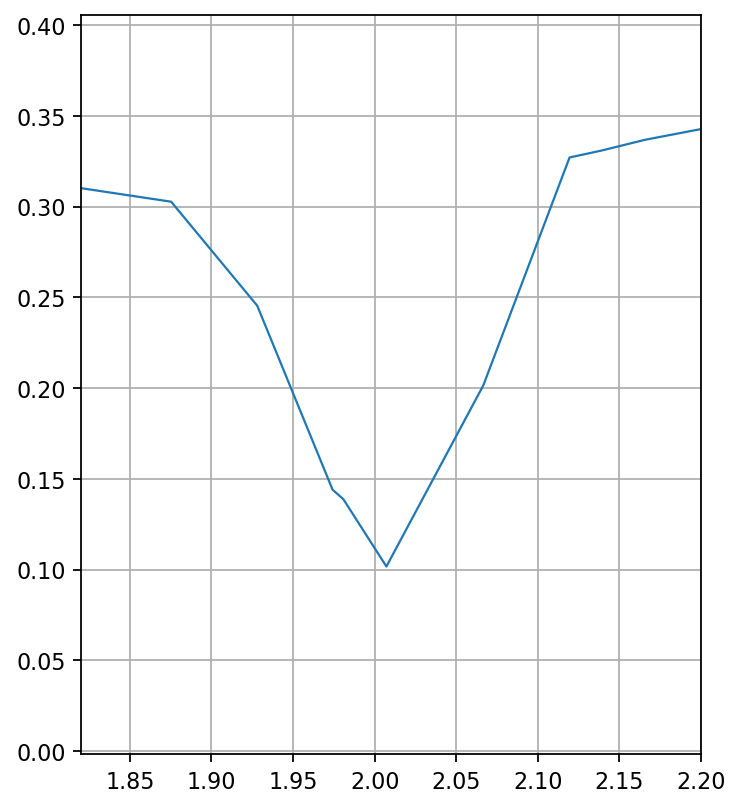

In [267]:
plt.figure(figsize=(5,6), dpi=160)
plt.plot(data['Wavelength'], data['0'], linewidth=1)
plt.grid()
plt.xlim(1.82,2.2)

# Just Plotting CRISM

## CRISM Fe Ca [0.44-3.9 um]

In [188]:
calcium_iron= organize_data('crism_fe_ca.txt')
calcium_iron

,Wavelength,Reflectance
0,0.43613,1.08789
1,0.44263,1.08799
2,0.44914,1.08552
3,0.45564,1.09086
4,0.46215,1.09190
...,...,...
475,3.87006,0.90324
476,3.87673,0.89757
477,3.88341,0.89308
478,3.89008,0.88872


## CRISM Fe Olivine [0.44-3.9 um]

In [191]:
olivine_fe_crism= organize_data('crism_fe_olivine.txt')
olivine_fe_crism

,Wavelength,Reflectance
0,0.43613,1.15776
1,0.44263,1.16285
2,0.44914,1.16020
3,0.45564,1.16018
4,0.46215,1.16030
...,...,...
475,3.87006,1.05177
476,3.87673,1.05505
477,3.88341,1.05696
478,3.89008,1.05782


# GYPSUM

In [199]:
gypsum= organize_data('crism_gypsum_sulfates.txt')
gypsum

,Wavelength,Reflectance
0,0.43613,0.89257
1,0.44263,0.87302
2,0.44914,0.87939
3,0.45564,0.87867
4,0.46215,0.87321
...,...,...
416,3.87006,0.73566
417,3.87673,0.73498
418,3.88341,0.73524
419,3.89008,0.73625


# ALUNITE SULFATES

In [207]:
sulfates= organize_data('crism_alunite_sulfates.txt')
sulfates

,Wavelength,Reflectance
0,0.43613,1.09576
1,0.44263,1.09237
2,0.44914,1.09091
3,0.45564,1.09389
4,0.46215,1.09707
...,...,...
463,3.87006,0.88035
464,3.87673,0.87737
465,3.88341,0.86739
466,3.89008,0.86340


# Chlorite_Phyllosilicates

In [219]:
chlor_phyllosilicates= organize_data('crism_chlorite_phyllosilicates.txt')
chlor_phyllosilicates

,Wavelength,Reflectance
0,0.43613,1.04095
1,0.44263,1.03985
2,0.44914,1.04182
3,0.45564,1.04132
4,0.46215,1.04556
...,...,...
475,3.87006,1.04077
476,3.87673,1.03926
477,3.88341,1.03940
478,3.89008,1.03813


# "Other CRISM Data"

In [224]:
other= organize_data('crism_epidote_other.txt')
other

,Wavelength,Reflectance
0,0.43613,1.06941
1,0.44263,1.08171
2,0.44914,1.07850
3,0.45564,1.07639
4,0.46215,1.07713
...,...,...
475,3.87006,0.86271
476,3.87673,0.86329
477,3.88341,0.86082
478,3.89008,0.85459


# HCP Iron (hexagonal close packed iron configuration)

In [227]:
iron_hcp= organize_data('crism_hcp_iron.txt')
iron_hcp

,Wavelength,Reflectance
0,0.43613,1.00603
1,0.44263,1.00707
2,0.44914,1.00521
3,0.45564,1.00569
4,0.46215,1.00270
...,...,...
475,3.87006,1.01767
476,3.87673,1.01920
477,3.88341,1.01939
478,3.89008,1.01808


# CRISM Hematite Iron

In [243]:
iron_hematite= organize_data('crism_hematite_iron.txt')
iron_hematite

,Wavelength,Reflectance
0,0.43613,0.94506
1,0.44263,0.94565
2,0.44914,0.94761
3,0.45564,0.94847
4,0.46215,0.94879
...,...,...
474,3.87006,1.05053
475,3.87673,1.03941
476,3.88341,1.03221
477,3.89008,1.02633


# All CRISM DATA

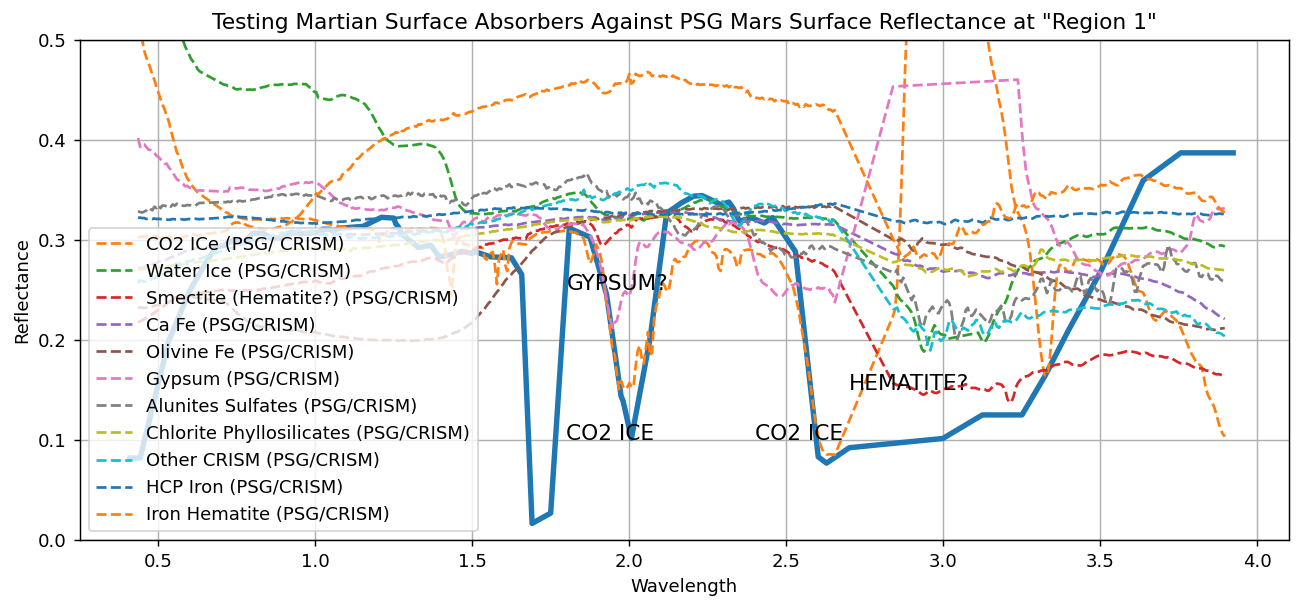

In [244]:
plt.figure(figsize=(12,5), dpi=130)
plt.plot(data['Wavelength'], data['0'], linewidth=3)
plt.plot(co2_ice['Wavelength'], co2_ice['Reflectance']*0.28, label='CO2 ICe (PSG/ CRISM)', linestyle='--')
plt.plot(water_ice['Wavelength'], water_ice['Reflectance']*0.4, label='Water Ice (PSG/CRISM)', linestyle='--')
plt.plot(smectite['Wavelength'], smectite['Reflectance']*0.18, label='Smectite (Hematite?) (PSG/CRISM)', linestyle='--')
plt.plot(calcium_iron['Wavelength'], calcium_iron['Reflectance']*0.25, label='Ca Fe (PSG/CRISM)', linestyle='--')
plt.plot(olivine_fe_crism['Wavelength'], olivine_fe_crism['Reflectance']*0.2, label='Olivine Fe (PSG/CRISM)', linestyle='--')
plt.plot(gypsum['Wavelength'], gypsum['Reflectance']*0.45, label='Gypsum (PSG/CRISM)', linestyle='--')
plt.plot(sulfates['Wavelength'], sulfates['Reflectance']*0.3, label='Alunites Sulfates (PSG/CRISM)', linestyle='--')
plt.plot(chlor_phyllosilicates['Wavelength'], chlor_phyllosilicates['Reflectance']*0.26, label='Chlorite Phyllosilicates (PSG/CRISM)', linestyle='--')
plt.plot(other['Wavelength'], other['Reflectance']*0.24, label='Other CRISM (PSG/CRISM)', linestyle='--')
plt.plot(iron_hcp['Wavelength'], iron_hcp['Reflectance']*0.32, label='HCP Iron (PSG/CRISM)', linestyle='--')
plt.plot(iron_hematite['Wavelength'], iron_hematite['Reflectance']*0.32, label='Iron Hematite (PSG/CRISM)', linestyle='--')
plt.grid()
plt.xlim(0.25,4.1)
plt.ylim(0,0.5)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.text(1.8, 0.1, 'CO2 ICE', fontsize=12, color='black')
plt.text(2.4, 0.1, 'CO2 ICE', fontsize=12, color='BLACK')
plt.text(1.8, 0.25, 'GYPSUM?', fontsize=12, color='black')
plt.text(2.7, 0.15, 'HEMATITE?', fontsize=12, color='BLACK')
plt.legend(loc='lower left')
plt.title('Testing Martian Surface Absorbers Against PSG Mars Surface Reflectance at "Region 1"')
plt.savefig('Mars_Absorbers_CRISM_all.png');

In [248]:
goethite= organize_data('goethite_psgfull.txt')

# RELEVANT CRISM ABSORBERS

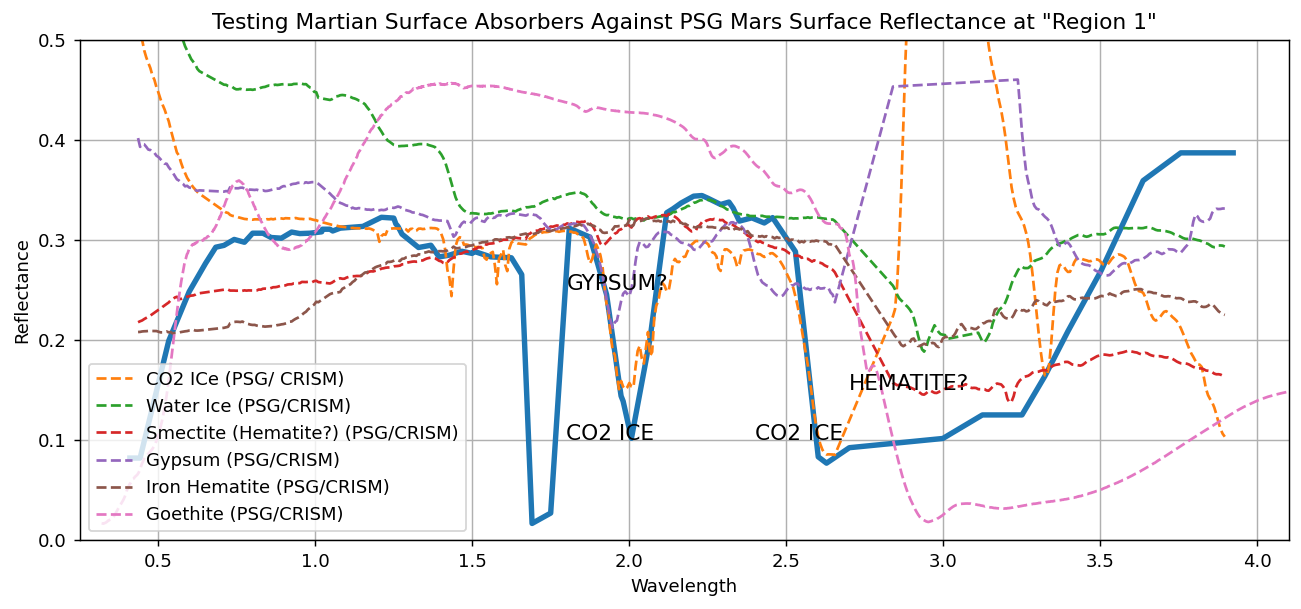

In [252]:
plt.figure(figsize=(12,5), dpi=130)
plt.plot(data['Wavelength'], data['0'], linewidth=3)
plt.plot(co2_ice['Wavelength'], co2_ice['Reflectance']*0.28, label='CO2 ICe (PSG/ CRISM)', linestyle='--')
plt.plot(water_ice['Wavelength'], water_ice['Reflectance']*0.4, label='Water Ice (PSG/CRISM)', linestyle='--')
plt.plot(smectite['Wavelength'], smectite['Reflectance']*0.18, label='Smectite (Hematite?) (PSG/CRISM)', linestyle='--')
plt.plot(gypsum['Wavelength'], gypsum['Reflectance']*0.45, label='Gypsum (PSG/CRISM)', linestyle='--')
plt.plot(iron_hematite['Wavelength'], iron_hematite['Reflectance']*0.22, label='Iron Hematite (PSG/CRISM)', linestyle='--')
plt.plot(goethite['Wavelength'], goethite['Reflectance']*0.6, label='Goethite (PSG/CRISM)', linestyle='--')
plt.xlim(0.25,4.1)
plt.ylim(0,0.5)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.text(1.8, 0.1, 'CO2 ICE', fontsize=12, color='black')
plt.text(2.4, 0.1, 'CO2 ICE', fontsize=12, color='BLACK')
plt.text(1.8, 0.25, 'GYPSUM?', fontsize=12, color='black')
plt.text(2.7, 0.15, 'HEMATITE?', fontsize=12, color='BLACK')
plt.legend(loc='lower left')
plt.title('Testing Martian Surface Absorbers Against PSG Mars Surface Reflectance at "Region 1"')
plt.grid()
plt.savefig('Mars_Absorbers_CRISM_relevant.png');

# UNSURE ABOUT

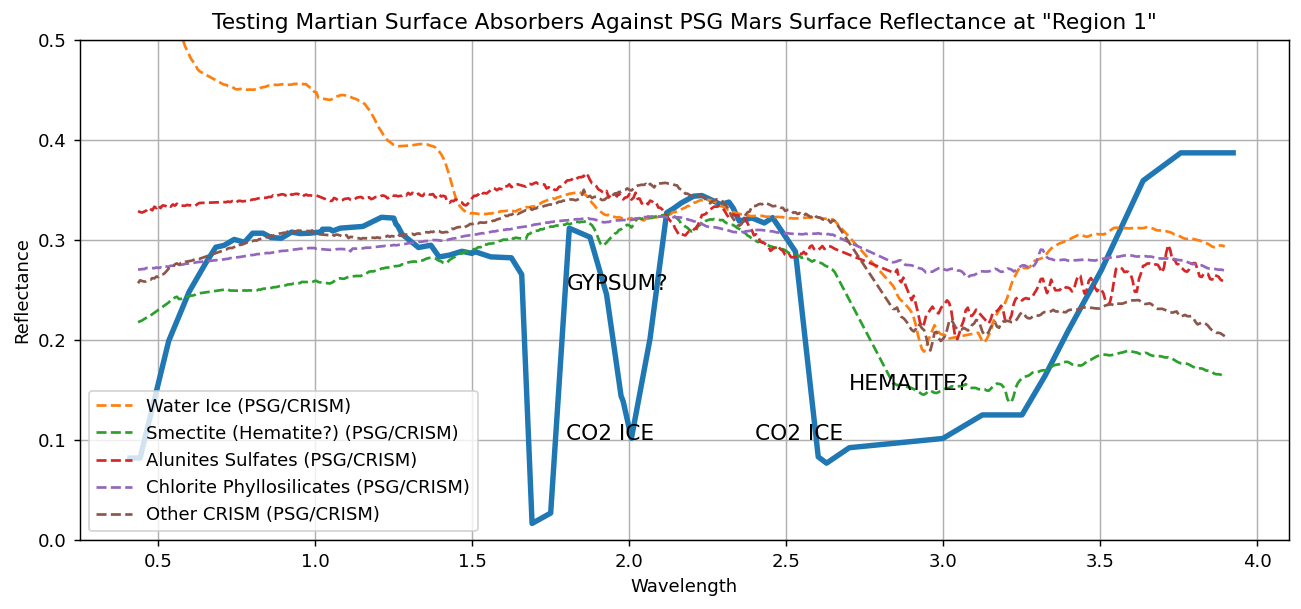

In [242]:
plt.figure(figsize=(12,5), dpi=130)
plt.plot(data['Wavelength'], data['0'], linewidth=3)
plt.plot(water_ice['Wavelength'], water_ice['Reflectance']*0.4, label='Water Ice (PSG/CRISM)', linestyle='--')
plt.plot(smectite['Wavelength'], smectite['Reflectance']*0.18, label='Smectite (Hematite?) (PSG/CRISM)', linestyle='--')
plt.plot(sulfates['Wavelength'], sulfates['Reflectance']*0.3, label='Alunites Sulfates (PSG/CRISM)', linestyle='--')
plt.plot(chlor_phyllosilicates['Wavelength'], chlor_phyllosilicates['Reflectance']*0.26, label='Chlorite Phyllosilicates (PSG/CRISM)', linestyle='--')
plt.plot(other['Wavelength'], other['Reflectance']*0.24, label='Other CRISM (PSG/CRISM)', linestyle='--')
plt.grid()
plt.xlim(0.25,4.1)
plt.ylim(0,0.5)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.text(1.8, 0.1, 'CO2 ICE', fontsize=12, color='black')
plt.text(2.4, 0.1, 'CO2 ICE', fontsize=12, color='BLACK')
plt.text(1.8, 0.25, 'GYPSUM?', fontsize=12, color='black')
plt.text(2.7, 0.15, 'HEMATITE?', fontsize=12, color='BLACK')
plt.legend(loc='lower left')
plt.title('Testing Martian Surface Absorbers Against PSG Mars Surface Reflectance at "Region 1"')
plt.savefig('Mars_Absorbers_CRISM_unsure.png');

In [33]:
hematite[0]

0         0.10000
1         0.10116
2         0.10233
3         0.10351
4         0.10471
          ...    
796     954.99259
797     966.05088
798     977.23722
799     988.55309
800    1000.00000
Name: 0, Length: 801, dtype: float64

In [ ]:
# Use scipy to fit 